## OPTIMISER LA GESTION DES DONNEES D'UNE BOUTIQUE

## Sommaire du notebook

**1. Import des données**

**2. Rapprochement des deux exports**

**3. Calcul du CA**

**4. Analyse de la variable prix**

**5. Etude des outliers**

In [ ]:
import pandas as pd
import numpy as np
import re

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Import des données

In [3]:
# Import des données issues de l'ERP

erp = pd.read_excel('erp.xlsx')
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# Vérification notamment des types de chaque colonne

erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
# Vérification de l'unicité des identifiants

erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# Import des données issues du web

web = pd.read_excel('web.xlsx')
web.tail()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1512,16230,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,Domaine Saint-Nicolas Vin de France Blanc Les ...,NaN,publish,closed,closed,NaN,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [8]:
# Vérification des types de chaque colonne et du nombre de valeurs non nulles

web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [9]:
# Suppression des colonnes sans valeurs et modification de la colonne sku

web = web.rename(columns = {'sku' : 'id_web'})
web = web.drop(columns = {'tax_class', 'post_content', 'post_password', 'post_content_filtered'})

In [10]:
# Comptage des NaN dans les identifiants

print(web.isnull().sum())

id_web                85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent           83
guid                  83
menu_order            83
post_type             83
post_mime_type       799
comment_count         83
dtype: int64


In [11]:
pd.set_option('display.max_rows', None)

In [12]:
# Etude des Nan dans les identifiants

idweb_nan = web[web['id_web'].isna()]
idweb_nan

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Vérification de la présence de ces vins à d'autres endroits du tableau

liste = ('pierre-jean-villa-cote-rotie-fongeant-2017', 'pierre-jean-villa-condrieu-suspendu-2018' )
web[web['post_name'].isin(liste)]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
# Suppression des nan

web = web.dropna(subset = 'id_web')

In [15]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null   int64         
 3   rating_count       1428 non-null   int64         
 4   average_rating     1428 non-null   float64       
 5   total_sales        1428 non-null   float64       
 6   tax_status         714 non-null    object        
 7   post_author        1428 non-null   float64       
 8   post_date          1428 non-null   datetime64[ns]
 9   post_date_gmt      1428 non-null   datetime64[ns]
 10  post_title         1428 non-null   object        
 11  post_excerpt       714 non-null    object        
 12  post_status        1428 non-null   object        
 13  comment_status     1428 non-null   object        
 14  ping_sta

In [16]:
# Vérification de l'unicité des identifiants

web.nunique()

id_web                714
virtual                 1
downloadable            1
rating_count            1
average_rating          1
total_sales            41
tax_status              1
post_author             2
post_date             714
post_date_gmt         714
post_title            711
post_excerpt          677
post_status             1
comment_status          1
ping_status             1
post_name             714
post_modified         587
post_modified_gmt     587
post_parent             1
guid                 1428
menu_order              1
post_type               2
post_mime_type          1
comment_count           1
dtype: int64

In [17]:
# Suppression des doublons id_web

web = web.drop_duplicates(subset = ['id_web'])
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

In [18]:
web.describe(include = 'all', datetime_is_numeric = True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,714,714.0,714.0,714.0,714.0,714.000000,714,714.000000,714,714,714,714,714,714,714,714,714,714,714.0,714,714.0,714,0,714.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,711,677,1,1,1,714,NaN,NaN,NaN,714,NaN,1,0,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,bon-cadeau-de-25-euros,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,714,NaN,NaN,NaN,2,12,714,714,714,1,NaN,NaN,NaN,1,NaN,714,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980608,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,NaN,0.0,NaN,NaN,0.0


In [19]:
# Suppression des colonnes non nécéssaires à l'étude

web = web.drop(columns = {'virtual', 'downloadable', 'rating_count','average_rating', 'tax_status', 'post_date', 'comment_count', 'comment_status', 'post_status', 'ping_status', 'post_mime_type', 'post_parent', 'menu_order'})
web.describe(include = 'all', datetime_is_numeric = True)

,id_web,total_sales,post_author,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
count,714,714.000000,714.000000,714,714,714,714,714,714,714,714
unique,714,NaN,NaN,NaN,711,677,714,NaN,NaN,714,1
top,bon-cadeau-25-euros,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,bon-cadeau-de-25-euros,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
freq,1,NaN,NaN,NaN,2,12,1,NaN,NaN,1,714
mean,NaN,4.012605,1.998599,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,NaN,NaN
min,NaN,0.000000,1.000000,2018-02-08 11:58:52,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN
25%,NaN,0.000000,2.000000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,NaN,NaN
50%,NaN,1.000000,2.000000,2018-04-19 12:52:10,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN
75%,NaN,4.000000,2.000000,2019-01-31 13:35:47,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,NaN
max,NaN,96.000000,2.000000,2020-07-20 09:00:00,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN


In [20]:
# Import des données de liaison

liaison = pd.read_excel('liaison.xlsx')
liaison.tail(20)

,product_id,id_web
805,7159,NaN
806,7161,NaN
807,7162,NaN
808,7163,NaN
809,7164,NaN
810,7168,NaN
811,7169,NaN
812,7170,NaN
813,7192,NaN
814,7193,NaN


In [21]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [22]:
# Modification du type de la colonne product_id

liaison['product_id'] = liaison['product_id'].astype('object')

In [23]:
# Etape 1 du merge 

data = pd.merge(liaison, erp, on = 'product_id', how = 'outer')
data

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.20,0,outofstock
1,3849,15296,1,34.30,0,outofstock
2,3850,15300,1,20.80,0,outofstock
3,4032,19814,1,14.10,0,outofstock
4,4039,19815,1,46.00,0,outofstock
5,4040,15303,1,34.30,0,outofstock
6,4041,14975,1,32.70,15,instock
7,4042,16042,1,31.20,34,instock
8,4043,14980,1,60.00,12,instock
9,4045,16041,1,42.60,66,instock


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   id_web          734 non-null    object 
 2   onsale_web      825 non-null    int64  
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.1+ KB


In [25]:
data.describe(include = 'all')

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
count,825.0,734.0,825.000000,825.000000,825.000000,825
unique,825.0,734.0,NaN,NaN,NaN,2
top,3847.0,15298.0,NaN,NaN,NaN,instock
freq,1.0,1.0,NaN,NaN,NaN,638
mean,NaN,NaN,0.869091,32.415636,26.496970,NaN
std,NaN,NaN,0.337506,26.795849,45.892422,NaN
min,NaN,NaN,0.000000,5.200000,0.000000,NaN
25%,NaN,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,NaN,1.000000,42.000000,34.000000,NaN


In [26]:
# Etape 2 du merge

data = pd.merge(data, web, on = 'id_web', how = 'outer', indicator = True)
data = data.rename(columns = {'total_sales' : 'total_sales_web'})
data.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales_web,post_author,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,_merge
0,3847,15298,1,24.2,0,outofstock,6.0,2.0,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,both
1,3849,15296,1,34.3,0,outofstock,0.0,2.0,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,both
2,3850,15300,1,20.8,0,outofstock,0.0,2.0,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,both
3,4032,19814,1,14.1,0,outofstock,3.0,2.0,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,both
4,4039,19815,1,46.0,0,outofstock,0.0,2.0,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,both


In [27]:
# Vérification du type de fusion des tables

data['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

In [28]:
data.describe(include = 'all', datetime_is_numeric = True)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales_web,post_author,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,_merge
count,825.0,734.0,825.000000,825.000000,825.000000,825,714.000000,714.000000,714,714,714,714,714,714,714,714,825
unique,825.0,734.0,NaN,NaN,NaN,2,NaN,NaN,NaN,711,677,714,NaN,NaN,714,1,2
top,3847.0,15298.0,NaN,NaN,NaN,instock,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,pierre-jean-villa-saint-joseph-preface-2018,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
freq,1.0,1.0,NaN,NaN,NaN,638,NaN,NaN,NaN,2,12,1,NaN,NaN,1,714,714
mean,NaN,NaN,0.869091,32.415636,26.496970,NaN,4.012605,1.998599,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,NaN,NaN,NaN
min,NaN,NaN,0.000000,5.200000,0.000000,NaN,0.000000,1.000000,2018-02-08 11:58:52,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN
25%,NaN,NaN,1.000000,14.600000,1.000000,NaN,0.000000,2.000000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,NaN,NaN,NaN
50%,NaN,NaN,1.000000,24.400000,11.000000,NaN,1.000000,2.000000,2018-04-19 12:52:10,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN,NaN
75%,NaN,NaN,1.000000,42.000000,34.000000,NaN,4.000000,2.000000,2019-01-31 13:35:47,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,NaN,NaN
max,NaN,NaN,1.000000,225.000000,578.000000,NaN,96.000000,2.000000,2020-07-20 09:00:00,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN


# Rapprochement des deux exports

In [29]:
data = data.loc[:, ['product_id', 'id_web', 'onsale_web', 'price','total_sales_web', 'stock_quantity', 'stock_status', 'post_title', 'post_excerpt', 'post_name']]
data

,product_id,id_web,onsale_web,price,total_sales_web,stock_quantity,stock_status,post_title,post_excerpt,post_name
0,3847,15298,1,24.20,6.0,0,outofstock,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018
1,3849,15296,1,34.30,0.0,0,outofstock,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,15300,1,20.80,0.0,0,outofstock,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,19814,1,14.10,3.0,0,outofstock,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018
4,4039,19815,1,46.00,0.0,0,outofstock,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017
5,4040,15303,1,34.30,0.0,0,outofstock,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,"Roussanne finement exotique, atypique par sa v...",pierre-jean-villa-saint-joseph-saut-ange-2018
6,4041,14975,1,32.70,0.0,15,instock,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,pierre-gaillard-condrieu-2018
7,4042,16042,1,31.20,7.0,34,instock,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,pierre-gaillard-cornas-2017
8,4043,14980,1,60.00,3.0,12,instock,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,"Complexité, finesse et subtilité sont au rende...",pierre-gaillard-cote-rotie-esprit-blond-2017
9,4045,16041,1,42.60,14.0,66,instock,Pierre Gaillard Côte Rôtie 2018,Ce vin exprime la diversité et l'équilibre ent...,pierre-gaillard-cote-rotie-2018


# Chiffre d'affaires par produit

In [30]:
data.insert(5, 'CA_total', data['price'] * data['total_sales_web'])

In [31]:
data.sort_values('CA_total', ascending = False).head(15)

,product_id,id_web,onsale_web,price,total_sales_web,CA_total,stock_quantity,stock_status,post_title,post_excerpt,post_name
286,4334,7818,1,49.0,96.0,4704.0,0,outofstock,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc
162,4144,1662,1,49.0,87.0,4263.0,11,instock,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose
310,4402,3510,1,176.0,13.0,2288.0,8,instock,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo
161,4142,11641,1,53.0,30.0,1590.0,8,instock,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006
160,4141,304,1,39.0,40.0,1560.0,1,instock,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve
293,4355,12589,1,126.5,11.0,1391.5,2,instock,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
291,4352,15940,1,225.0,5.0,1125.0,0,outofstock,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008
170,4153,16237,1,29.0,36.0,1044.0,0,outofstock,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est tr...",elian-daros-cotes-du-marmandais-clos-baquey-2015
761,6206,16580,1,25.2,41.0,1033.2,120,instock,Domaine Giudicelli Patrimonio Blanc 2019,Ce Patrimonio Blanc signé Muriel Giudicelli no...,domaine-giudicelli-patrimonio-blanc-2019
121,4068,16416,1,16.6,62.0,1029.2,157,instock,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019


In [32]:
data.describe()

,onsale_web,price,total_sales_web,CA_total,stock_quantity
count,825.000000,825.000000,714.000000,714.000000,825.000000
mean,0.869091,32.415636,4.012605,98.835574,26.496970
std,0.337506,26.795849,8.518183,307.685071,45.892422
min,0.000000,5.200000,0.000000,0.000000,0.000000
25%,1.000000,14.600000,0.000000,0.000000,1.000000
50%,1.000000,24.400000,1.000000,15.250000,11.000000
75%,1.000000,42.000000,4.000000,91.150000,34.000000
max,1.000000,225.000000,96.000000,4704.000000,578.000000


# Total du chiffre d'affaires réalisé en ligne

In [33]:
CA_total = data['CA_total'].sum()
print("Nous avons réalisé un chiffre d'affaires total de", CA_total, "€ en ligne.")

Nous avons réalisé un chiffre d'affaires total de 70568.6 € en ligne.


# Analyse de la variable prix

In [34]:
# Calcul des 1er et 3e quartiles puis de l'écart interquartile

prix = np.array(data['price'])
Q1 = np.percentile(prix, 25)
Q3 = np.percentile(prix, 75)
IQ = Q3-Q1

display(Q1, Q3, IQ)

14.6

42.0

27.4

In [35]:
# Détection des outliers avec la méthode de l'écart interquartile

outliers_IQ = data.loc[(data['price'] < (Q1 - 1.5*IQ)) | (data['price'] > (Q3 + 1.5*IQ)), 'price']
outliers_IQ.shape

(37,)

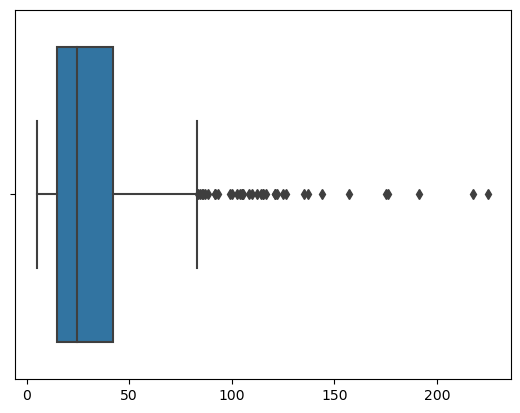

In [36]:
# Visualisation des outliers à l'aide d'un diagramme à moustache

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = prix)
plt.show()

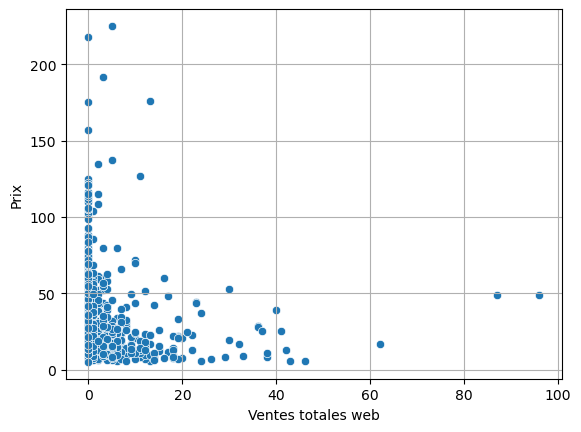

In [37]:
# Visualisation des potentiels outliers à l'aide d'un graphique prix/ventes web

sns.scatterplot(data=data, x='total_sales_web', y='price')

plt.ylabel("Prix")

plt.xlabel('Ventes totales web')

plt.grid()

plt.show()

In [38]:
# Classement des vins selon le nombre de ventes afin de faire ressortir les potentielles valeurs abérrantes

data.sort_values('total_sales_web', ascending = False).head(5)

,product_id,id_web,onsale_web,price,total_sales_web,CA_total,stock_quantity,stock_status,post_title,post_excerpt,post_name
286,4334,7818,1,49.0,96.0,4704.0,0,outofstock,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc
162,4144,1662,1,49.0,87.0,4263.0,11,instock,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose
121,4068,16416,1,16.6,62.0,1029.2,157,instock,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019
210,4200,16295,1,5.8,46.0,266.8,190,instock,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,"Rosé très agréable, intense, floral et minéral...",moulin-de-gassac-igp-pays-dherault-guilhem-ros...
188,4172,16210,1,5.7,43.0,245.1,167,instock,Maurel Pays d'Oc Chardonnay 2019,Un très joli petit chardonnay qui nous révèle ...,maurel-pays-oc-chardonnay-2019


# Etude des 3 vins dont le prix pourrait ne pas être correct

In [39]:
# Champagne Gosset Grand Blanc de Blancs : https://boutique.champagne-gosset.com/produit/gosset-grand-blanc-de-blancs/

# Prix dans notre boutique internet : 49€
# Prix trouvé chez le producteur : 60€
# Soit un différentiel de plus de 18% en notre défaveur


In [40]:
# Champagne Gosset Grand Rosé : https://boutique.champagne-gosset.com/produit/gosset-grand-rose/

# Prix dans notre boutique internet : 49€
# Prix trouvé chez le producteur : 60€
# Soit un différentiel de plus de 18% en notre défaveur


In [41]:
# Gilles Robin Crozes-Hermitage Rouge Papillon 2019 : https://www.gillesrobin.com/product/vin-crozes-hermitage-aop-papillon-2019/

# Prix dans notre boutique internet : 16,60€
# Prix trouvé chez le producteur : 16€
# Notre prix affiché est donc correct


# Analyse des outliers avec la méthode du z-score

In [42]:
prix = pd.DataFrame(prix)
prix = prix.rename(columns = {0 : 'Prix'})
prix.head()

,Prix
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0


In [43]:
prix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prix    825 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [44]:
moyenne = prix['Prix'].mean()
ecart_type = prix['Prix'].std()

In [45]:
type(moyenne)

numpy.float64

In [46]:
type(ecart_type)

float

In [47]:
prix['z_score'] = prix['Prix'].apply(lambda x:(x-moyenne)/ecart_type)
prix.head()

,Prix,z_score
0,24.2,-0.306601
1,34.3,0.070323
2,20.8,-0.433486
3,14.1,-0.683525
4,46.0,0.506958


<function matplotlib.pyplot.show(close=None, block=None)>

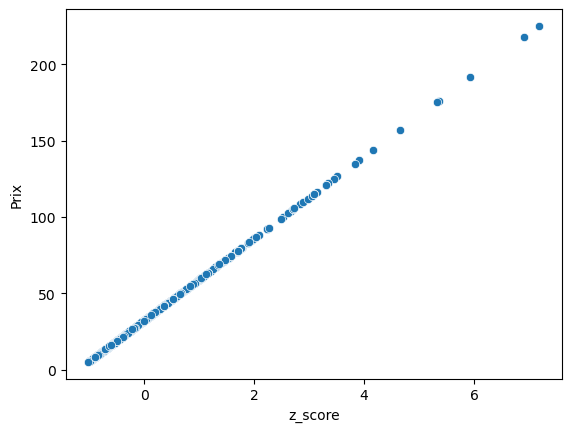

In [48]:
sns.scatterplot(data=prix, x='z_score', y='Prix')
plt.show